In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date, datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
directory = os.path.abspath("").split("\\")[:-1]
csv_path = "/".join(directory + ["03_Process", "Clean_Cyclistic_Data.csv"])

df = pd.read_csv(csv_path, index_col=0)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,start_hour,season,month,mins,mins_end
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,N Clark St & W Elm St,Streeter Dr & Grand Ave,41.900000,-87.630000,41.892278,-87.612043,casual,12.400000,6,11:00,spring,5,718,730
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,DIVVY CASSETTE REPAIR MOBILE STATION,Museum of Science and Industry,41.880958,-87.616743,41.791728,-87.583945,casual,44.916667,6,11:00,spring,5,689,734
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,Milwaukee Ave & Fullerton Ave,Milwaukee Ave & Fullerton Ave,41.920000,-87.700000,41.920000,-87.700000,casual,1.200000,6,14:00,spring,5,864,865
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,Milwaukee Ave & Fullerton Ave,Rockwell St & Fletcher St,41.920000,-87.700000,41.940000,-87.690000,casual,15.216667,6,14:00,spring,5,865,881
4,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,Rockwell St & Fletcher St,Elston Ave & Henderson St,41.940000,-87.690000,41.940000,-87.700000,casual,6.883333,6,18:00,spring,5,1095,1102


In [3]:
# number of members vs number of riders

df["member_casual"].value_counts()

member    3220186
casual    2532599
Name: member_casual, dtype: int64

## When Do Riders Ride?

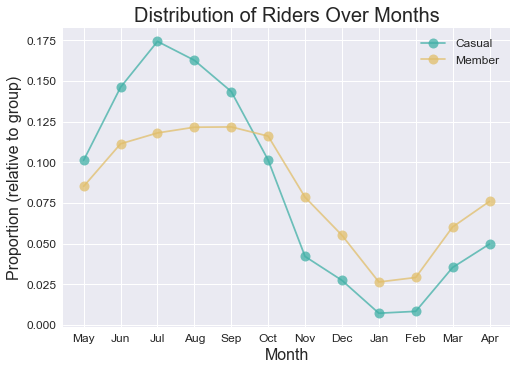

In [75]:
plt.style.use("seaborn")

ct = pd.crosstab(df.member_casual, df.month, normalize="index")
months = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]
cas = [ct.iloc[0][i] for i in months]
mem = [ct.iloc[1][i] for i in months]
x = np.arange(12)

fig, ax = plt.subplots()
_ = ax.plot(
    x, cas, label="Casual",
    color="#40B0A6", alpha=0.75, marker=".", markersize=20 
)
_ = ax.plot(
    x, mem, label="Member",
    color="#E1BE6A", alpha=0.75, marker=".", markersize=20
)

_ = ax.set(
    xticks=x,
    xticklabels=["May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr"]
)
_ = ax.set_title("Distribution of Riders Over Months", fontsize=20)
_ = ax.set_xlabel("Month", fontsize=16)
_ = ax.set_ylabel("Proportion (relative to group)", fontsize=16)
_ = ax.tick_params(axis="both", which="major", labelsize=12)

_ = ax.legend(prop={"size": 12})

plt.savefig("figures/rider_distribution_over_months.png", dpi=600, format="png")

In [78]:
del ct, months, cas, mem, x, fig, ax

NameError: name 'months' is not defined

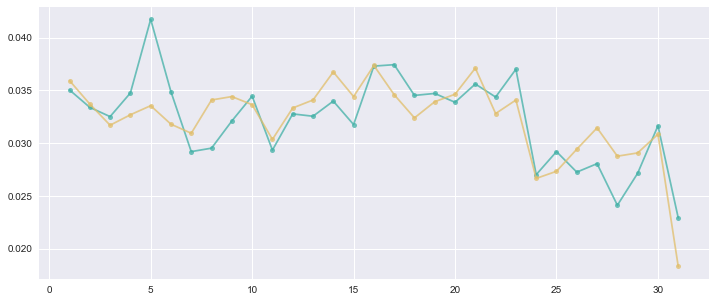

In [68]:
def day_month(dt):
    d = dt.split(" ")[0].split("-")
    day = int(d[-1])

    return day

df["day_of_month"] = df.started_at.apply(day_month)

ct = pd.crosstab(df.member_casual, df.day_of_month, normalize="index")
fig, ax = plt.subplots(figsize=(12, 5))
_ = ax.plot(
    ct.iloc[0], label="Casual",
    color="#40B0A6", alpha=0.75, marker=".", markersize=10)
_ = ax.plot(
    ct.iloc[1], label="Member",
    color="#E1BE6A", alpha=0.75, marker=".", markersize=10)


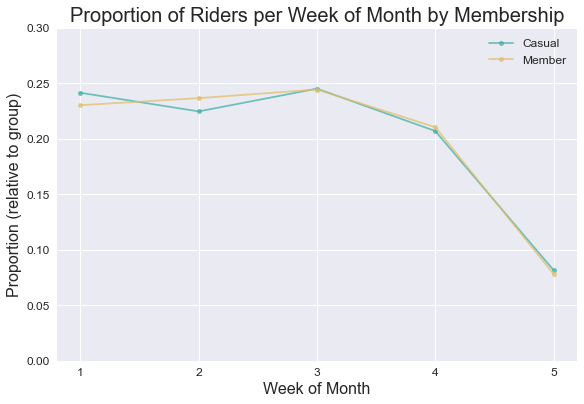

In [52]:
df["week_of_month"] = df.day_of_month.apply(lambda x: (x-1)//7)

ct = pd.crosstab(df.member_casual, df.week_of_month, normalize="index")
fig, ax = plt.subplots(constrained_layout=True)
_ = ax.plot(
    ct.iloc[0], label="Casual",
    color="#40B0A6", alpha=0.75, marker=".", markersize=10)
_ = ax.plot(
    ct.iloc[1], label="Member",
    color="#E1BE6A", alpha=0.75, marker=".", markersize=10)
_ = ax.set_ylim((0, 0.3))
_ = ax.set_xticks([0, 1, 2, 3, 4])
_ = ax.set_xticklabels([1, 2, 3, 4, 5])
_ = ax.set_xlabel("Week of Month", fontsize=16)
_ = ax.set_ylabel("Proportion (relative to group)", fontsize=16)
_ = ax.tick_params(axis="both", which="major", labelsize=12)
_ = ax.legend(prop={"size": 12})
_ = ax.set_title("Proportion of Riders per Week of Month by Membership", fontsize=20)

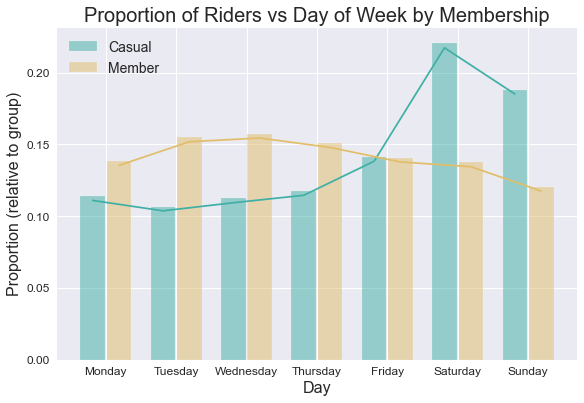

In [83]:
plt.style.use("seaborn")

ct = pd.crosstab(df.member_casual, df.day_of_week, normalize='index')
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
x = np.arange(7)
width = 0.35
hspace = 0.0125


fig, ax = plt.subplots(constrained_layout=True)
_ = ax.bar(
    x=(x-(width/2 + hspace)), height=ct.loc["casual"], label="Casual",
    facecolor="#40B0A6", edgecolor="white", alpha=0.5, width=width    
)
_ = ax.plot(
    (x-(width/2 + hspace)), ct.iloc[0]-0.003,
    color="#40B0A6", alpha=1
)
_ = ax.bar(
    x=(x+(width/2 + hspace)), height=ct.loc["member"], width=width,
    facecolor="#E1BE6A", edgecolor="white", alpha=0.5,
    label="Member")
_ = ax.plot(
    (x+(width/2 + hspace)), ct.iloc[1]-0.003,
    color="#E1BE6A", alpha=1
)


_ = ax.set(
    xticks=x,
    xticklabels=days
)
_ = ax.set_title("Proportion of Riders vs Day of Week by Membership", fontsize=20)
_ = ax.set_xlabel("Day", fontsize=16)
_ = ax.set_ylabel("Proportion (relative to group)", fontsize=16)
_ = ax.tick_params(axis="both", which="major", labelsize=12)

_ = ax.legend(prop={"size": 14})

plt.savefig("figures/weekday_proportion_by_membership.png", dpi=600, format="png")

In [74]:
del ct, days, x, width, hspace, fig, ax, _

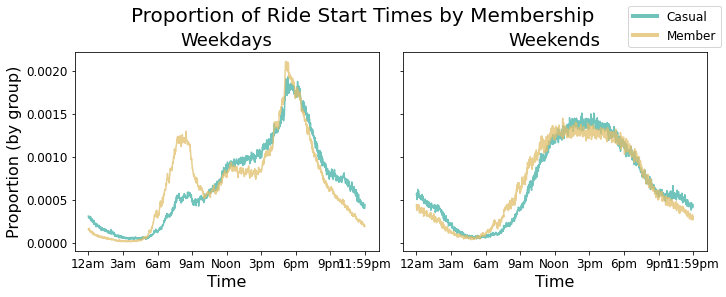

In [3]:
def minutes(dt):
    t = dt.split(" ")[1].split(":")[:2]
    h, m = map(int, t)

    return 60*h + m


df["mins"] = df.started_at.apply(minutes)
df["mins_end"] = df.ended_at.apply(minutes)

dys_df = df[df["day_of_week"] < 5]
ct_weekday = pd.crosstab(dys_df.member_casual, dys_df.mins, normalize="index")
dys_df = df[df["day_of_week"] >= 5]
ct_weekend = pd.crosstab(dys_df.member_casual, dys_df.mins, normalize="index")


fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True, figsize=(10, 4), sharey=True)
_ = ax1.plot(ct_weekday.iloc[0], color="#40B0A6", alpha=0.75, label="Casual")
_ = ax1.plot(ct_weekday.iloc[1], color="#E1BE6A", alpha=0.75, label="Member")
_ = ax1.set_title("Weekdays", fontsize=18)
_ = ax1.set_xlabel("Time", fontsize=16)
_ = ax1.set_ylabel("Proportion (by group)", fontsize=16)
_ = ax1.set_xticks([0, 180, 360, 540, 720, 900, 1080, 1260, 1439])
_ = ax1.set_xticklabels(["12am", "3am", "6am", "9am", "Noon", "3pm", "6pm", "9pm", "11:59pm"])
_ = ax1.tick_params(axis="both", which="major", labelsize=12)

_ = ax2.plot(ct_weekend.iloc[0], color="#40B0A6", alpha=0.75, label="Casual")
_ = ax2.plot(ct_weekend.iloc[1], color="#E1BE6A", alpha=0.75, label="Member")
_ = ax2.set_title("Weekends", fontsize=18)
_ = ax2.set_xlabel("Time", fontsize=16)
_ = ax2.set_xticks([0, 180, 360, 540, 720, 900, 1080, 1260, 1439])
_ = ax2.set_xticklabels(["12am", "3am", "6am", "9am", "Noon", "3pm", "6pm", "9pm", "11:59pm"])
_ = ax2.tick_params(axis="both", which="major", labelsize=12)

_ = fig.suptitle("Proportion of Ride Start Times by Membership", fontsize=20)

custom_lines = [Line2D([0], [0], color="#40B0A6", lw=4, alpha=0.75),
                Line2D([0], [0], color="#E1BE6A", lw=4, alpha=0.75)]
_ = fig.legend(custom_lines, ["Casual", "Member"], prop={"size": 12})

plt.savefig("figures/daily_proportion_by_membership.png", dpi=600, format="png")

In [4]:
del dys_df, ct_weekday, ct_weekend, fig, ax1, ax2, _, custom_lines

## Ride Length (time)

Across the year and all rideable types, casual riders ride, on average, for almost 
twice as long as members. Casual riders ride longer on every rideable type and 
all throughout the year.

In [24]:
# average ride_length of members vs casuals

df.groupby("member_casual")["ride_length"].mean()

member_casual
casual    29.041099
member    12.899898
Name: ride_length, dtype: float64

In [25]:
# distribution of ride_length, member vs casual

df.groupby("member_casual").ride_length.describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2532599.0,29.041099,233.284842,0.0,8.816667,15.550000,28.400000,55944.150000
member,3220186.0,12.899898,20.117306,0.0,5.333333,9.183333,15.916667,1499.933333


In [14]:
rl_trim_df = df[(df["ride_length"] > np.percentile(df.ride_length, 1)) & (df["ride_length"] < np.percentile(df.ride_length, 99))]

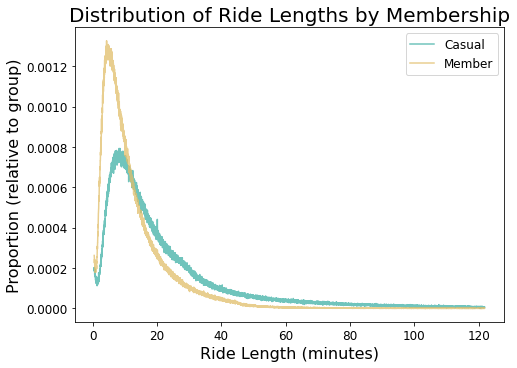

In [41]:
ct = pd.crosstab(rl_trim_df.member_casual, rl_trim_df.ride_length, normalize="index")

fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
_ = ax.plot(
    ct.iloc[0], label="Casual",
    color="#40B0A6", alpha=0.75
)
_ = ax.plot(
    ct.iloc[1], label="Member",
    color="#E1BE6A", alpha=0.75
)
_ = ax.legend(prop={"size": 12})
_ = ax.set_xlabel("Ride Length (minutes)", fontsize=16)
_ = ax.set_ylabel("Proportion (relative to group)", fontsize=16)
_ = ax.set_title("Distribution of Ride Lengths by Membership", fontsize=20)
_ = ax.tick_params(axis="both", which="major", labelsize=12)

plt.savefig("figures/ride_length_distribution.png", dpi=600, format="png")

In [42]:
del ct, fig, ax, _

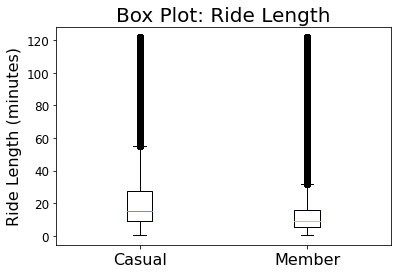

In [39]:
cas_vec = rl_trim_df[rl_trim_df["member_casual"] == "casual"].ride_length
mem_vec = rl_trim_df[rl_trim_df["member_casual"] == "member"].ride_length

fig, ax = plt.subplots()
box_plot = ax.boxplot([cas_vec, mem_vec], labels=["Casual", "Member"])
box_plot["medians"][0].set_color("#40B0A6")
box_plot["medians"][1].set_color("#E1BE6A")
_ = ax.set_ylabel("Ride Length (minutes)", fontsize=16)
_ = ax.tick_params(axis="x", which="major", labelsize=16)
_ = ax.tick_params(axis="y", which="major", labelsize=12)
_ = ax.set_title("Box Plot: Ride Length", fontsize=20)

plt.savefig("figures/ride_length_boxplot.png", dpi=600, format="png")

In [40]:
del cas_vec, mem_vec, fig, ax, box_plot, _

In [29]:
ct.iloc[0]

ride_length
0.483333      494
0.500000      493
0.516667      474
0.533333      459
0.550000      498
             ... 
121.783333     15
121.800000     19
121.816667     19
121.833333     21
121.850000     14
Name: casual, Length: 7283, dtype: int64

In [26]:
# 1% trimmmed average ride_length for members and casuals

avg_trimmed_members = stats.trim_mean(df[df["member_casual"] == "member"].ride_length, 0.01)
avg_trimmed_casuals = stats.trim_mean(df[df["member_casual"] == "casual"].ride_length, 0.01)

print(f"members: {avg_trimmed_members}\ncasuals: {avg_trimmed_casuals}")

members: 11.994285038731002
casuals: 23.313622640916478


In [27]:
# ride length by season

avg_trimmed_winter = stats.trim_mean(df[df["season"] == "winter"].ride_length, 0.01)
avg_trimmed_spring = stats.trim_mean(df[df["season"] == "spring"].ride_length, 0.01)
avg_trimmed_summer = stats.trim_mean(df[df["season"] == "summer"].ride_length, 0.01)
avg_trimmed_autumn = stats.trim_mean(df[df["season"] == "autumn"].ride_length, 0.01)

print(f"winter: {avg_trimmed_winter}\nspring: {avg_trimmed_spring}\nsummer: {avg_trimmed_summer}\nautumn: {avg_trimmed_autumn}")

winter: 12.562520737823027
spring: 18.203198484203757
summer: 18.30887208849457
autumn: 13.600595573740813


In [28]:
# average ride length (time) by season by membership status

for status in ["casual", "member"]:
    avg_trimmed_winter = stats.trim_mean(df[(df["season"] == "winter") & (df["member_casual"] == status)].ride_length, 0.01)
    avg_trimmed_spring = stats.trim_mean(df[(df["season"] == "spring") & (df["member_casual"] == status)].ride_length, 0.01)
    avg_trimmed_summer = stats.trim_mean(df[(df["season"] == "summer") & (df["member_casual"] == status)].ride_length, 0.01)
    avg_trimmed_autumn = stats.trim_mean(df[(df["season"] == "autumn") & (df["member_casual"] == status)].ride_length, 0.01)

    print(f"""{status}: 
        winter: {avg_trimmed_winter}
        spring: {avg_trimmed_spring}
        summer: {avg_trimmed_summer}
        autumn: {avg_trimmed_autumn}\n""")

casual: 
        winter: 19.69543090430399
        spring: 26.029165186007905
        summer: 23.96237471890435
        autumn: 18.966652960943758

member: 
        winter: 10.434350367627582
        spring: 12.44557051177263
        summer: 12.961584617959424
        autumn: 10.905228603364469



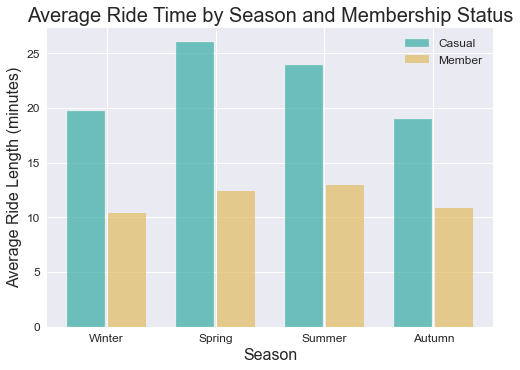

In [43]:
szn_avg_cas = [19.69543090430399, 26.029165186007905, 23.96237471890435, 18.966652960943758]
szn_avg_mem = [10.434350367627582, 12.44557051177263, 12.961584617959424, 10.905228603364469]
width = 0.35
x = np.arange(len(szn_avg_cas))


plt.style.use("seaborn")
fig, ax = plt.subplots()
_ = ax.bar(
    x - (width/2 + 0.0125), szn_avg_cas, 
    color="#40B0A6", alpha=0.75, edgecolor="white", width=width,
    label="Casual")

_ = ax.bar(
    x + (width/2 + 0.0125), szn_avg_mem,
    color="#E1BE6A", alpha=0.75, width=width,
    label="Member")

_ = ax.set(
    xticks=x,
    xticklabels=["Winter", "Spring", "Summer", "Autumn"],
)
_ = ax.tick_params(axis="both", which="major", labelsize=12)
_ = ax.set_title("Average Ride Time by Season and Membership Status", fontsize=20)
_ = ax.set_ylabel("Average Ride Length (minutes)", fontsize=16)
_ = ax.set_xlabel("Season", fontsize=16)
_ = ax.legend(prop={"size": 12})

plt.savefig("figures/avg_ridelength_by_season_membership.png", dpi=600, format="png")

In [44]:
del szn_avg_cas, szn_avg_mem, width, x, fig, ax, _

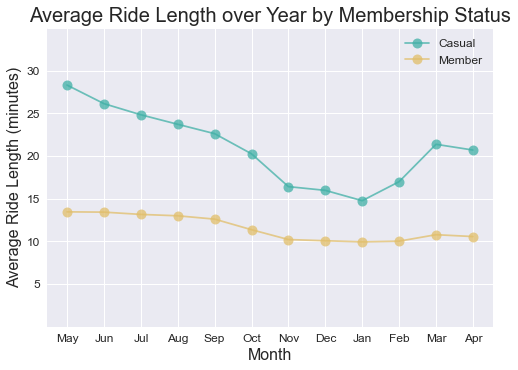

In [45]:
monthly_avg_cas = []
monthly_avg_mem = []
months = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]   # data is from may 2021-april 2022

for month in months:
    monthly_avg_cas.append(stats.trim_mean(df[(df["month"] == month) & (df["member_casual"] == "casual")].ride_length, 0.01))
    monthly_avg_mem.append(stats.trim_mean(df[(df["month"] == month) & (df["member_casual"] == "member")].ride_length, 0.01))

x = np.arange(len(monthly_avg_mem))

fig, ax = plt.subplots()
_ = ax.plot(
    x, monthly_avg_cas, label="Casual",
    color="#40B0A6", alpha=0.75, marker=".", markersize=20
)
_ = ax.plot(
    x, monthly_avg_mem, label="Member",
    color="#E1BE6A", alpha=0.75, marker=".", markersize=20
)

_ = ax.set(
    xticks=x,
    xticklabels=["May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr"],
    yticks=[0, 5, 10, 15, 20, 25, 30, 35],
    yticklabels=["", "5", "10", "15", "20", "25", "30", ""]
)
_ = ax.tick_params(axis="both", which="major", labelsize=12)
_ = ax.set_xlabel("Month", fontsize=16)
_ = ax.set_ylabel("Average Ride Length (minutes)", fontsize=16)
_ = ax.set_title("Average Ride Length over Year by Membership Status", fontsize=20)
_ = ax.set_ylim(0)

_ = ax.legend(prop={"size": 12})

plt.savefig("figures/avg_ridelength_overyear_by_membership.png", dpi=600, format="png")

In [46]:
del monthly_avg_cas, monthly_avg_mem, months, x, fig, ax, _

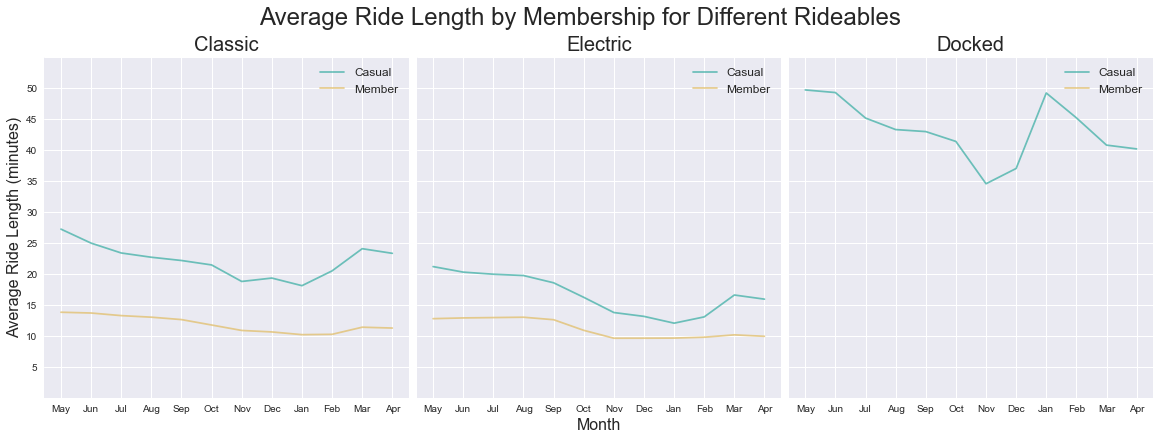

In [33]:
months = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]   # data is from may 2021-april 2022
rideables = df.rideable_type.value_counts().index

ls = []
for rideable in rideables:
    ls1 = []
    for status in ["member", "casual"]:
        ls2 = []
        for month in months:
            ls2.append(stats.trim_mean(df[(df["month"] == month)
                                        & (df["member_casual"] == status)
                                        & (df["rideable_type"] == rideable)].ride_length, 0.01))
        ls1.append(ls2)
    ls.append(ls1)
        

x = np.arange(len(months))

fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, constrained_layout=True, figsize=(16, 6))

for i in range(len(axs)):
    _ = axs[i].plot(x, ls[i][1], color="#40B0A6", alpha=0.75, label="Casual")    
    _ = axs[i].plot(x, ls[i][0], color="#E1BE6A", alpha=0.75, label="Member")
    _ = axs[i].set(
        xticks=x,
        xticklabels=["May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr"],
        yticks=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
        yticklabels=["", "5", "10", "15", "20", "25", "30", "35", "40", "45", "50", ""]
    )
    _ = axs[i].set_title(rideables[i].split("_")[0].capitalize(), fontsize=20)

    _ = axs[i].legend(prop={"size": 12})

_ = axs[0].set_ylabel("Average Ride Length (minutes)", fontsize=16)
_ = axs[1].set_xlabel("Month", fontsize=16)

_ = fig.suptitle("Average Ride Length by Membership for Different Rideables", fontsize=24)


# plt.savefig("figures/avg_ridelength_over_year_by_membership_rideabletype.png", dpi=600, format="png")

In [34]:
del months, rideables, ls, ls1, ls2, x, fig, axs, _

## Rideable Types

Both groups ride electric bikes at almost identical rates but casual riders 
accounted for all but one of docked bike rides, this is what makes of the difference 
percentage-wise between the use of classic bikes between the groups.

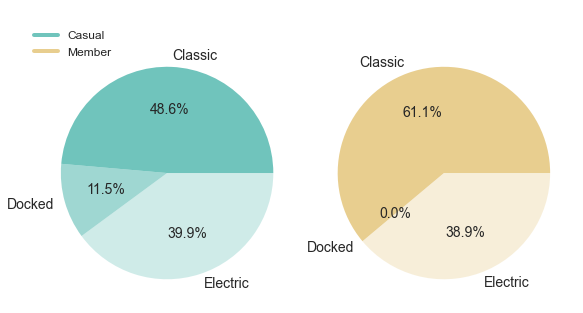

In [35]:
alphas = [0.25, 0.5, 0.75][::-1]
colors = [["#40B0A6"], ["#E1BE6A"]]
labels = ["Classic", "Docked", "Electric"]
rideable_types_ct = pd.crosstab(df.member_casual, df.rideable_type)

fig, axs = plt.subplots(ncols=2, constrained_layout=True, figsize=(8, 6))

for i in range(2):
    pie = axs[i].pie(rideable_types_ct.iloc[i], colors=colors[i], 
        labels=labels, autopct="%1.1f%%", textprops={"fontsize": 14})
    for j in range(len(rideable_types_ct.iloc[0])):
        pie[0][j].set_alpha(alphas[j])



custom_lines = [Line2D([0], [0], color=colors[0][0], lw=4, alpha=0.75),
                Line2D([0], [0], color=colors[1][0], lw=4, alpha=0.75)]
_ = fig.legend(custom_lines, ["Casual", "Member"], prop={"size": 12}, loc=(0.05, 0.8))
_ = fig.set_facecolor("white")

# plt.savefig("figures/piechart_rideables_by_membership.png", dpi=600, format="png")

In [36]:
del alphas, colors, labels, rideable_types_ct, fig, axs, custom_lines, _

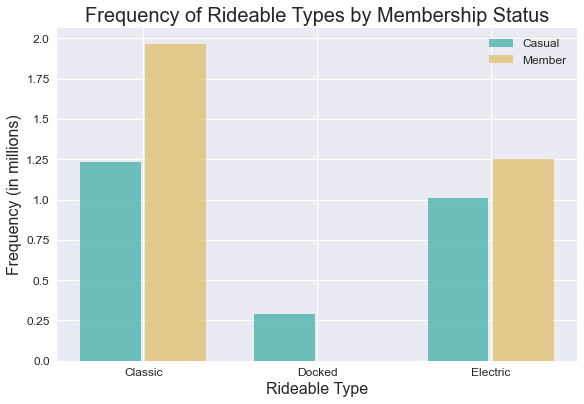

In [37]:
rideable_types_ct = pd.crosstab(df.member_casual, df.rideable_type)

x = np.arange(3)
width = 0.35
hspace = 0.0125

fig, ax = plt.subplots(constrained_layout=True)
_ = ax.bar(
    x - (width/2 + hspace), rideable_types_ct.loc["casual"],
    width=width, color="#40B0A6", alpha=0.75,
    label="Casual")
_ = ax.bar(
    x + (width/2 + hspace), rideable_types_ct.loc["member"], 
    width=width, color="#E1BE6A", alpha=0.75,
    label="Member")

_ = ax.set_xticks(x)
_ = ax.set_xticklabels(["Classic", "Docked", "Electric"])
_ = ax.set_yticks(np.arange(9)*250000)
_ = ax.set_yticklabels(np.arange(9)/4)
_ = ax.tick_params(axis="both", which="major", labelsize=12)
_ = ax.set_xlabel("Rideable Type", fontsize=16)
_ = ax.set_ylabel("Frequency (in millions)", fontsize=16)
_ = ax.set_title("Frequency of Rideable Types by Membership Status", fontsize=20)
_ = ax.legend(prop={"size": 12})


# plt.savefig("figures/barchart_rideabletypes_by_membership.png", dpi=600, format="png")

In [38]:
del rideable_types_ct, x, width, hspace, fig, ax, _

## Location


10.6% of casual riders end their ride at the same station it began compared to 
just 5.9% of members.  
Of the 10 most popular routes for casual riders, 6 of them began and ended at 
the same location, including all of the top 4. Only 2 of the top 10 most 
popular routes among members met this criteria (#1 and #4). 

In [39]:
closed_path_cas = len(df[(df["member_casual"] == "casual") & (df["start_station_name"] == df["end_station_name"])])
closed_path_mem = len(df[(df["member_casual"] == "member") & (df["start_station_name"] == df["end_station_name"])])


# proportion of (casuals, members) who start and end their ride at the same station
closed_path_cas/df["member_casual"].value_counts()["casual"], closed_path_mem/df["member_casual"].value_counts()["member"]

(0.1059393926950141, 0.05949966865268031)

In [40]:
del closed_path_cas, closed_path_mem

In [41]:
start_station_counts = df.groupby(["member_casual"]).start_station_name.value_counts()
start_station_counts.loc["casual"][:5].sum()/df["member_casual"].value_counts()["casual"], start_station_counts.loc["member"][:5].sum()/df["member_casual"].value_counts()["member"]

(0.07109179147587123, 0.050410752670808454)

In [42]:
del start_station_counts

In [43]:
df["route"] = df["start_station_name"] + "  -->  " + df["end_station_name"]
routes_by_membership = df.groupby("member_casual").route.value_counts()
routes_by_membership["casual"][:10], routes_by_membership["member"][:10]

(route
 Streeter Dr & Grand Ave  -->  Streeter Dr & Grand Ave                        13290
 Millennium Park  -->  Millennium Park                                         5546
 Michigan Ave & Oak St  -->  Michigan Ave & Oak St                             5511
 DuSable Lake Shore Dr & Monroe St  -->  DuSable Lake Shore Dr & Monroe St     3927
 Streeter Dr & Grand Ave  -->  Millennium Park                                 3596
 DuSable Lake Shore Dr & Monroe St  -->  Streeter Dr & Grand Ave               3551
 Millennium Park  -->  Streeter Dr & Grand Ave                                 3329
 Montrose Harbor  -->  Montrose Harbor                                         3256
 Theater on the Lake  -->  Theater on the Lake                                 3236
 Shedd Aquarium  -->  Streeter Dr & Grand Ave                                  3150
 Name: route, dtype: int64,
 route
 University Ave & 57th St  -->  University Ave & 57th St                  20127
 Ellis Ave & 60th St  -->  University 

In [44]:
del routes_by_membership

In [23]:
# start_station_counts = df.groupby(["member_casual"]).start_station_name.value_counts().sort_index()
# end_station_counts = df.groupby(["member_casual"]).end_station_name.value_counts().sort_index()

# cas_interactions = pd.Series(data=(start_station_counts.loc["casual"].values + end_station_counts.loc["casual"].values), index=start_station_counts.loc["casual"].index)
# mem_interactions = pd.Series(data=(start_station_counts.loc["member"].values + end_station_counts.loc["member"].values), index=start_station_counts.loc["member"].index)
# membership_col = ["casual"]*len(cas_interactions) + ["member"]*len(mem_interactions)

# interactions = pd.DataFrame(
#     data={
#         "station": cas_interactions.index.to_list() + mem_interactions.index.to_list(),
#         "count": list(cas_interactions.values) + list(mem_interactions.values),
#         "membership": membership_col
#     })


# stations_lat = []
# stations_lng = []
# stations = interactions.station.to_list()

# for i in range(len(stations)//2):
#     t = df.loc[df.start_station_name == stations[i]]
#     stations_lat.append(t.iloc[0, 8])
#     stations_lng.append(t.iloc[0, 9])

# interactions["latitude"] = stations_lat*2
# interactions["longitude"] = stations_lng*2

# interactions

,station,count,membership,latitude,longitude
0,2112 W Peterson Ave,1428,casual,41.994780,-87.660285
1,351,2272,casual,41.891847,-87.620580
2,63rd St Beach,3560,casual,41.781016,-87.576120
3,900 W Harrison St,5724,casual,41.872078,-87.629544
4,Aberdeen St & Jackson Blvd,7381,casual,41.899608,-87.668458
...,...,...,...,...,...
1723,Woodlawn Ave & 55th St,10761,member,41.791478,-87.599861
1724,Woodlawn Ave & 75th St,112,member,41.765286,-87.621748
1725,Woodlawn Ave & Lake Park Ave,3674,member,41.799494,-87.586450
1726,Yates Blvd & 75th St,1864,member,41.751294,-87.597552


In [24]:
# interactions.to_csv("station_interactions.csv")